In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
vgdata=pd.read_csv('data/vgsales.csv')


In [9]:
vgdata.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
vgdata.loc[vgdata[['Year', 'Publisher']].isnull().any(axis=1), ['Year', 'Publisher']]


,Year,Publisher
179,NaN,Electronic Arts
377,NaN,Electronic Arts
431,NaN,Warner Bros. Interactive Entertainment
470,NaN,NaN
607,NaN,Atari
...,...,...
16427,NaN,Unknown
16493,NaN,Unknown
16494,2014.0,NaN
16543,2011.0,NaN


In [18]:
vgdata.loc[:,['Publisher']].fillna('unknown',inplace=True)

In [20]:
vgdata.loc[:,['Year']].fillna(-1,inplace=True)

In [35]:
vgdata.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

In [37]:
vgdata.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

In [41]:
avg_sales=vgdata.groupby('Genre')['NA_Sales'].mean()
avg_sales.sort_values(ascending=False).head(1)

Genre
Platform    0.504571
Name: NA_Sales, dtype: float64

In [45]:
top10_games=vgdata.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)

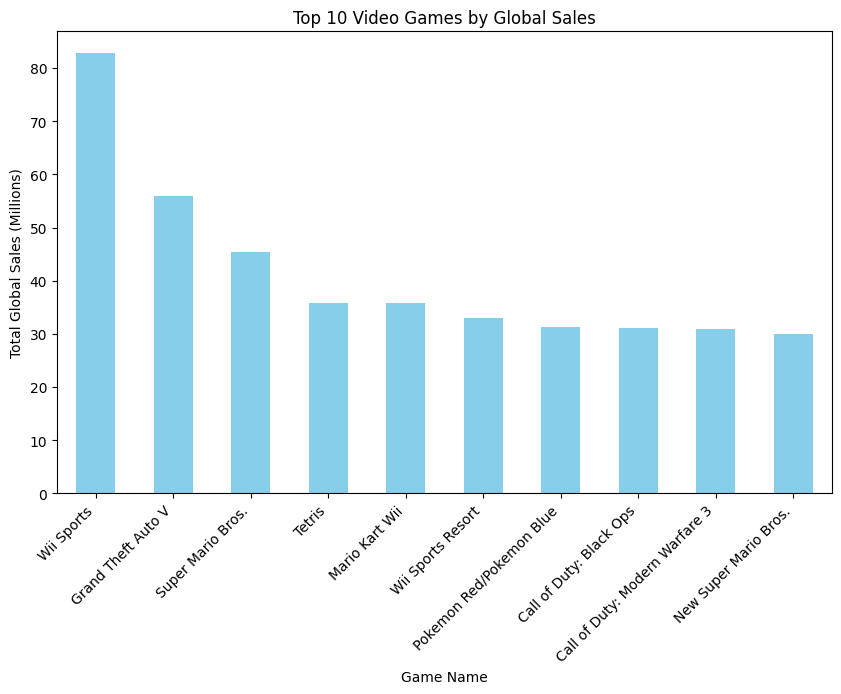

In [48]:
top10_games.plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title('Top 10 Video Games by Global Sales')
plt.xlabel('Game Name')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.show()
